In [121]:
import torch
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt


In [122]:
#housingData = pd.readcsv("Data/housing.csv")
#housingData = pd.readcsv("Data/housing.csv")

## Part 1-A

In [123]:
# Define the model
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [124]:
# Generate sample data
t_u = torch.linspace(0, 1, 100)  # normalized input
t_c = t_u * 50  # target values (just for illustration)

# Initialize parameters
w1 = torch.randn(1, requires_grad=True)
w2 = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

In [125]:
# Define the loss function
def loss_fn(y, y_pred):
    return ((y - y_pred)**2).mean()

In [126]:



# Training loop
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    w1, w2, b = params
    optimizer = optim.SGD([w1, w2, b], lr=learning_rate)
    losses = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_c, t_p)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
        
        losses.append(loss.item())
    
    return w1, w2, b, losses



Training with learning rate: 0.1
Epoch 500, Loss: 2.0165157318115234
Epoch 1000, Loss: 1.1526169776916504
Epoch 1500, Loss: 0.6588214039802551
Epoch 2000, Loss: 0.3765718340873718
Epoch 2500, Loss: 0.2152433842420578
Epoch 3000, Loss: 0.12302925437688828
Epoch 3500, Loss: 0.07032229751348495
Epoch 4000, Loss: 0.04019559919834137
Epoch 4500, Loss: 0.02297562174499035
Epoch 5000, Loss: 0.013132915832102299
Training with learning rate: 0.01
Epoch 500, Loss: 11.830753326416016
Epoch 1000, Loss: 4.090362548828125
Epoch 1500, Loss: 3.2825427055358887
Epoch 2000, Loss: 3.0557403564453125
Epoch 2500, Loss: 2.8855698108673096
Epoch 3000, Loss: 2.7283082008361816
Epoch 3500, Loss: 2.5799055099487305
Epoch 4000, Loss: 2.439596652984619
Epoch 4500, Loss: 2.3069193363189697
Epoch 5000, Loss: 2.181462526321411
Training with learning rate: 0.001
Epoch 500, Loss: 115.50155639648438
Epoch 1000, Loss: 58.27585983276367
Epoch 1500, Loss: 44.19081497192383
Epoch 2000, Loss: 35.01878356933594
Epoch 2500, L

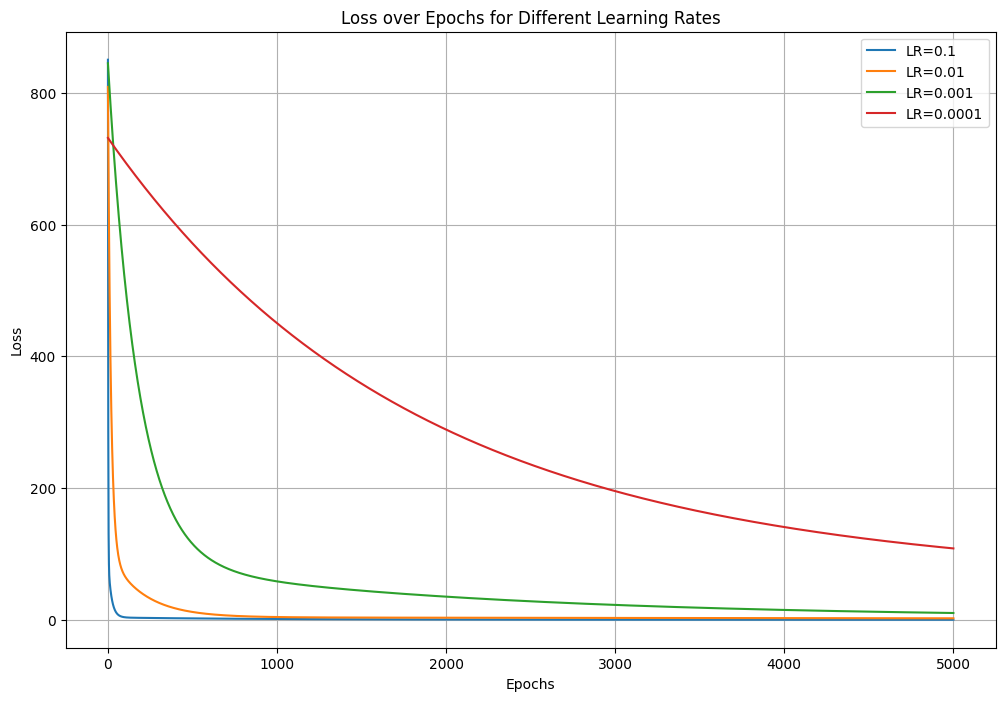

In [127]:
# Training for different learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]
n_epochs = 5000

all_losses = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    w1, w2, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
    w1, w2, b, losses = training_loop(n_epochs, lr, (w1, w2, b), t_u, t_c)
    all_losses[lr] = losses

# Plot the loss for each learning rate
plt.figure(figsize=(12, 8))
for lr, losses in all_losses.items():
    plt.plot(range(1, n_epochs + 1), losses, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

As the graph above shows the learning rate of 0.1 has the best performace. 

Training with learning rate: 0.0001
Epoch 500, Loss: 699.5209350585938
Epoch 1000, Loss: 548.2045288085938
Epoch 1500, Loss: 433.6020202636719
Epoch 2000, Loss: 346.69952392578125
Epoch 2500, Loss: 280.69805908203125
Epoch 3000, Loss: 230.47061157226562
Epoch 3500, Loss: 192.15013122558594
Epoch 4000, Loss: 162.82022094726562
Epoch 4500, Loss: 140.28094482421875
Epoch 5000, Loss: 122.87335968017578


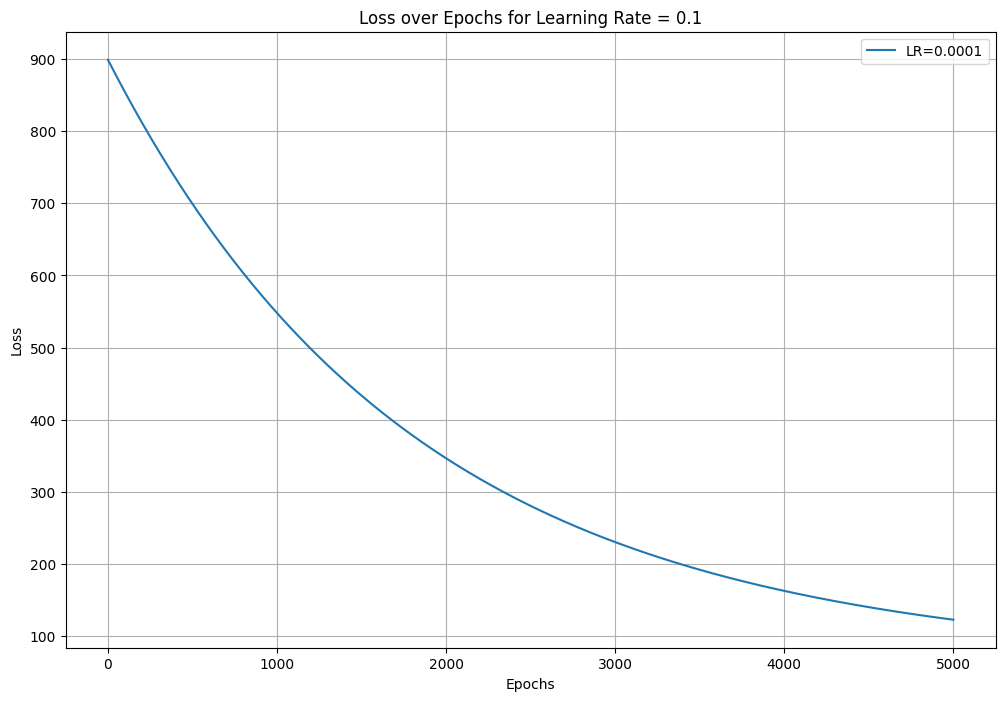

In [128]:
# Training for different learning rates
learning_rates = [0.1]
n_epochs = 5000

all_losses = {}

print(f"Training with learning rate: {lr}")
w1, w2, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
w1, w2, b, losses = training_loop(n_epochs, lr, (w1, w2, b), t_u, t_c)
all_losses[lr] = losses

# Plot the loss for each learning rate
plt.figure(figsize=(12, 8))
for lr, losses in all_losses.items():
    plt.plot(range(1, n_epochs + 1), losses, label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss over Epochs for Learning Rate = {learning_rates[0]}')
plt.legend()
plt.grid(True)
plt.show()

## Part 1-B

In [129]:
# Linear model definition
def linear_model(t_u, w, b):
    return w * t_u + b

In [130]:
# Training loop for linear model
def linear_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    w, b = params
    optimizer = optim.SGD([w, b], lr=learning_rate)
    for epoch in range(1, n_epochs + 1):
        t_p = linear_model(t_u, w, b)
        loss = loss_fn(t_c, t_p)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}")
    
    return w, b


Training linear model
Epoch 500, Loss: 32.84074401855469
Epoch 1000, Loss: 8.582932472229004
Epoch 1500, Loss: 2.243173360824585
Epoch 2000, Loss: 0.5862568020820618
Epoch 2500, Loss: 0.15321782231330872
Epoch 3000, Loss: 0.040044523775577545
Epoch 3500, Loss: 0.010465234518051147
Epoch 4000, Loss: 0.0027351167518645525
Epoch 4500, Loss: 0.0007150681340135634
Epoch 5000, Loss: 0.00018698142957873642


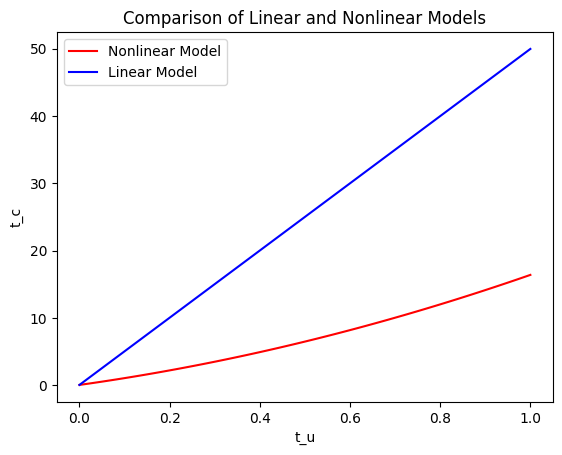

In [131]:



# Train the linear model
print("Training linear model")
w, b = torch.randn(1, requires_grad=True), torch.randn(1, requires_grad=True)
linear_training_loop(n_epochs, 0.01, (w, b), t_u, t_c)

# Plotting the results
import matplotlib.pyplot as plt

# Plot the dataset
#plt.scatter(t_u, t_c, label='Data')

# Plot the best nonlinear model
t_p_nonlinear = model(t_u, w1, w2, b)  # assuming w1, w2, b are the best parameters
plt.plot(t_u.detach().numpy(), t_p_nonlinear.detach().numpy(), label='Nonlinear Model', color='red')

# Plot the linear model
t_p_linear = linear_model(t_u, w, b)  # assuming w, b are the parameters of linear model
plt.plot(t_u.detach().numpy(), t_p_linear.detach().numpy(), label='Linear Model', color='blue')

plt.legend()
plt.xlabel('t_u')
plt.ylabel('t_c')
plt.title('Comparison of Linear and Nonlinear Models')
plt.show()


# Problem 2

Load the data

In [132]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [133]:

data = pd.read_csv('Data/Housing.csv')


In [134]:
# Features and target
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
y = data['price']


In [135]:
X_scaled =StandardScaler().fit_transform(X)


In [136]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Problem 2-B

Define learning rates and training epochs

In [137]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
epochs = 5000
report_interval = 500

results = {}

In [138]:
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=42)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.partial_fit(X_train, y_train)
        
        # Calculate training loss
        train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, train_pred)
        train_losses.append(train_loss)
        
        # Calculate validation loss
        val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, val_pred)
        val_losses.append(val_loss)
        
        # Print loss every report_interval epochs
        if (epoch + 1) % report_interval == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        

    # Calculate final R^2 score on validation set
    final_val_pred = model.predict(X_val)
    final_r2 = r2_score(y_val, final_val_pred)

    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'r2_score': final_r2
    }


Training with learning rate: 0.1
Epoch 500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 5000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787

Training with learning rate: 0.01
Epoch 500/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.7739
Epoch 1000/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.77

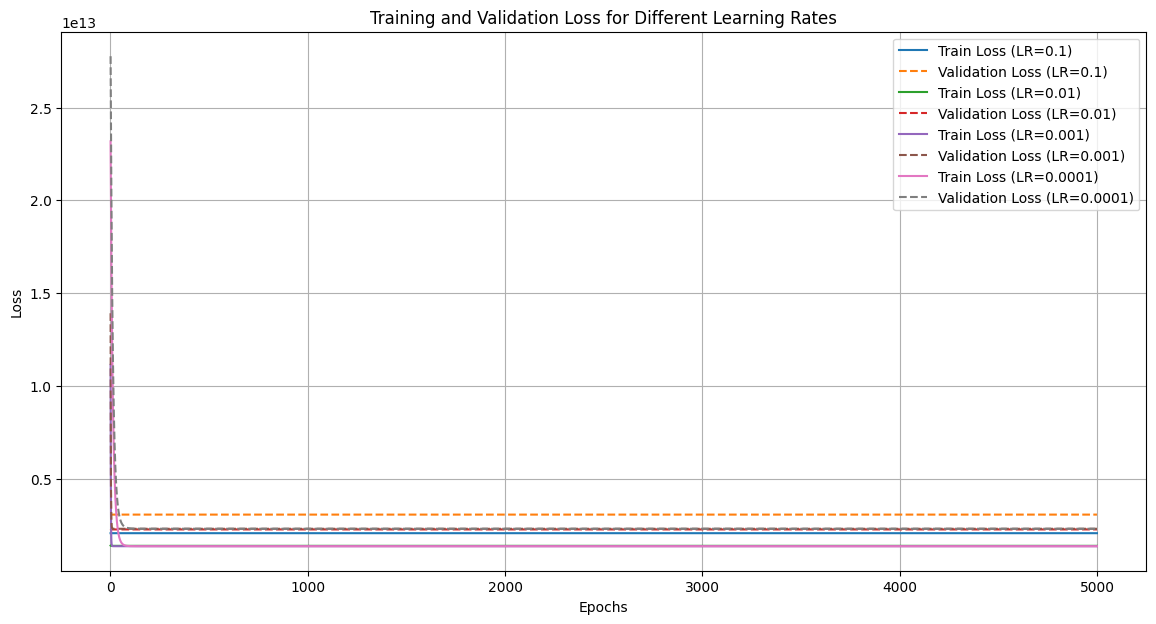

In [152]:
# Plotting the results
plt.figure(figsize=(14, 7))

for lr in learning_rates:
    plt.plot(range(1, epochs + 1), results[lr]['train_losses'], label=f'Train Loss (LR={lr})')
    plt.plot(range(1, epochs + 1), results[lr]['val_losses'], linestyle='dashed', label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
# Find the best model
best_lr = max(results, key=lambda k: results[k]['r2_score'])
print(f"\nBest learning rate: {best_lr}")
print(f"Validation R^2 Score: {results[best_lr]['r2_score']:.4f}")

# Print loss every 500 epochs for the best model
for epoch in range(0, epochs, report_interval):
    print(f"Epoch {epoch + 1}: Train Loss = {results[best_lr]['train_losses'][epoch]:.4f}, Val Loss = {results[best_lr]['val_losses'][epoch]:.4f}")


Best learning rate: 0.01
Validation R^2 Score: 0.5538
Epoch 1: Train Loss = 1384696169991.2700, Val Loss = 2271928245560.9224
Epoch 501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739


# Problem 3

In [141]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [142]:
X = data.drop(columns=['price'])
y = data['price']

In [143]:
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()


In [144]:
numerical_transformer = StandardScaler()


In [145]:
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')


In [146]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [147]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [148]:
# Define the model
model = SGDRegressor(max_iter=1, tol=None, random_state=42)

# Create and compile the pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

In [149]:
results = {}
for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    model = SGDRegressor(learning_rate='constant', eta0=lr, max_iter=1, tol=None, random_state=42)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.partial_fit(X_train, y_train)
        
        # Calculate training loss
        train_pred = model.predict(X_train)
        train_loss = mean_squared_error(y_train, train_pred)
        train_losses.append(train_loss)
        
        # Calculate validation loss
        val_pred = model.predict(X_val)
        val_loss = mean_squared_error(y_val, val_pred)
        val_losses.append(val_loss)
        
        # Print loss every report_interval epochs
        if (epoch + 1) % report_interval == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Calculate final R^2 score on validation set
    final_val_pred = model.predict(X_val)
    final_r2 = r2_score(y_val, final_val_pred)

    results[lr] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'r2_score': final_r2
    }


Training with learning rate: 0.1
Epoch 500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 1500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 2500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 3500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 4500/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787
Epoch 5000/5000, Train Loss: 2052580435104.9512, Val Loss: 3055003838470.6787

Training with learning rate: 0.01
Epoch 500/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.7739
Epoch 1000/5000, Train Loss: 1370823248389.5959, Val Loss: 2255210166860.77

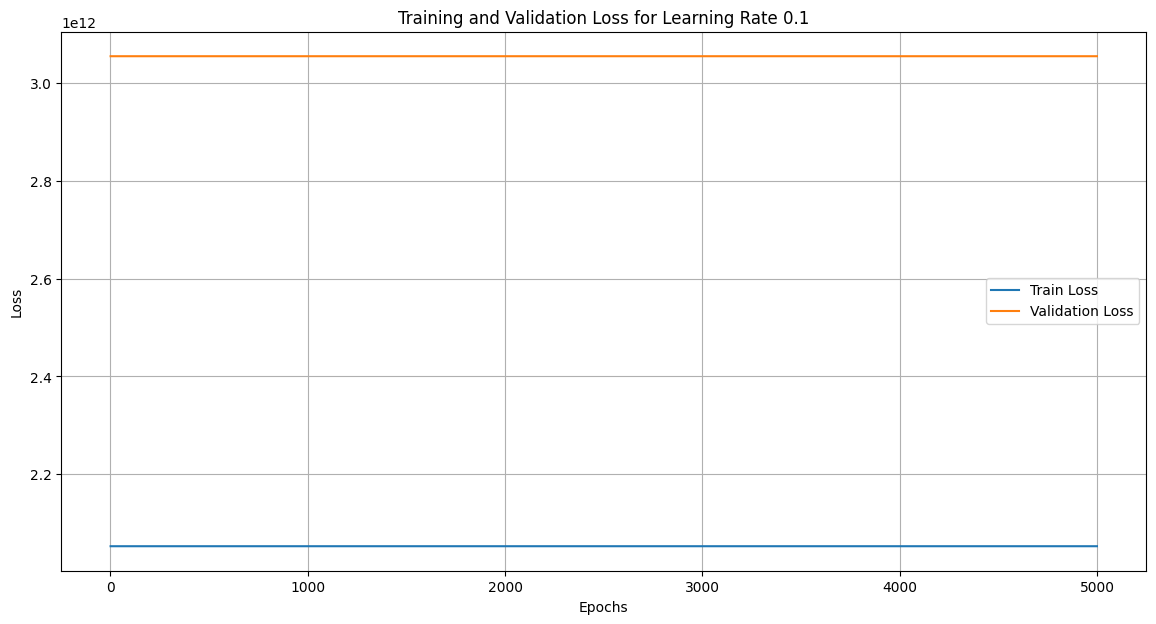

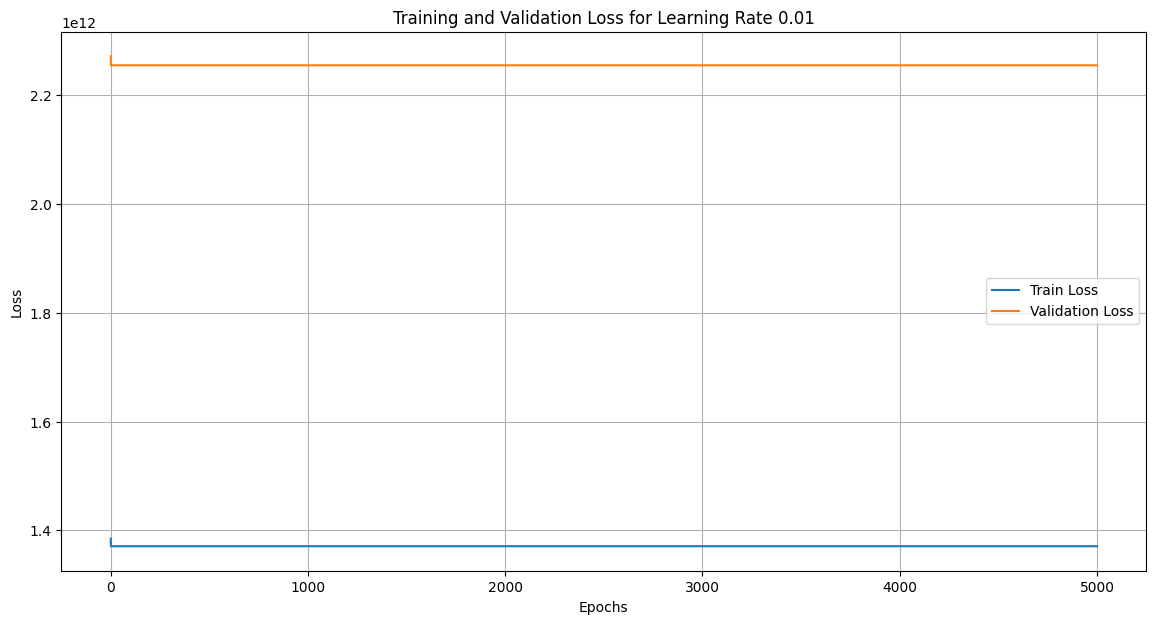

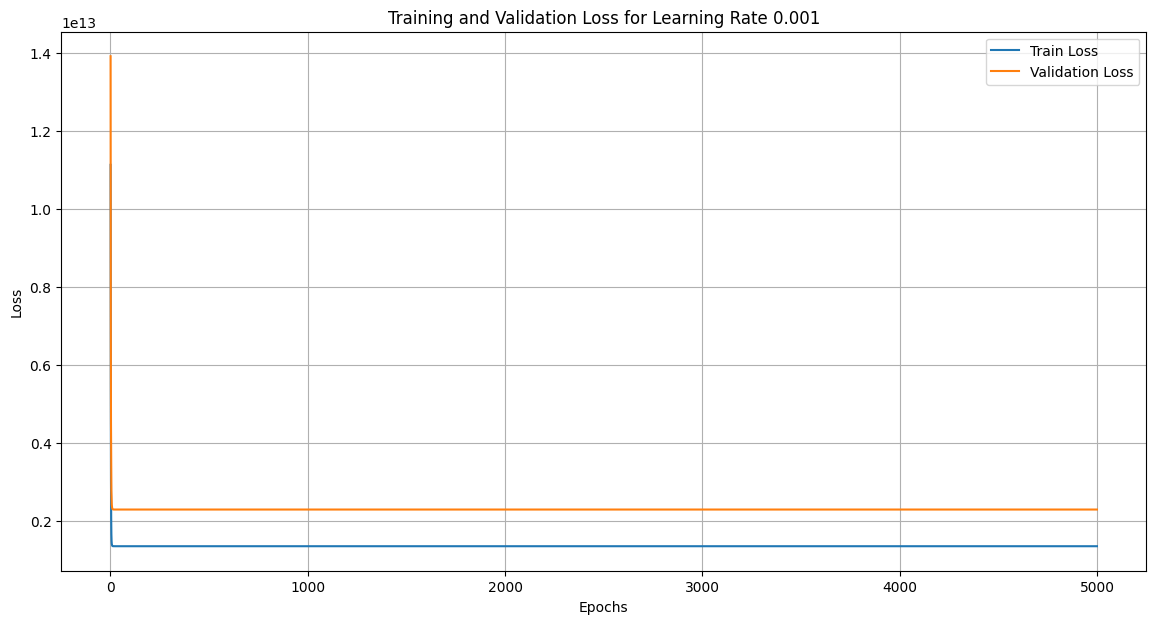

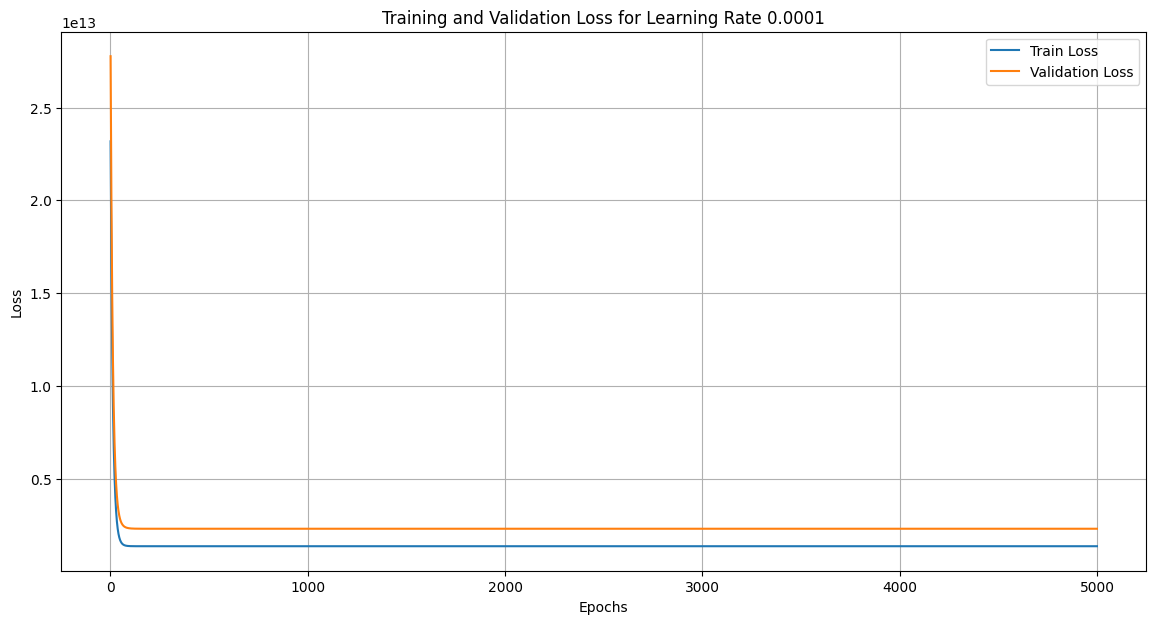

In [150]:
# Plotting the results
plt.figure(figsize=(14, 7))

for lr in learning_rates:
    plt.plot(range(1, epochs + 1), results[lr]['train_losses'], label=f'Train Loss (LR={lr})')
    plt.plot(range(1, epochs + 1), results[lr]['val_losses'], linestyle='dashed', label=f'Validation Loss (LR={lr})')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

In [151]:
# Find the best model
best_lr = max(results, key=lambda k: results[k]['r2_score'])
print(f"\nBest learning rate: {best_lr}")
print(f"Validation R^2 Score: {results[best_lr]['r2_score']:.4f}")

# Print loss every 500 epochs for the best model
for epoch in range(0, epochs, report_interval):
    print(f"Epoch {epoch + 1}: Train Loss = {results[best_lr]['train_losses'][epoch]:.4f}, Val Loss = {results[best_lr]['val_losses'][epoch]:.4f}")



Best learning rate: 0.01
Validation R^2 Score: 0.5538
Epoch 1: Train Loss = 1384696169991.2700, Val Loss = 2271928245560.9224
Epoch 501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 1501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 2501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 3501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4001: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
Epoch 4501: Train Loss = 1370823248389.5959, Val Loss = 2255210166860.7739
